In [1]:
#importing packages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [2]:
#Reading csv file
covid_data=pd.read_csv("world_data.csv")
covid_data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
39928,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-22,702,12,203,487,Africa
39929,NaN,Yemen,15.552727,48.516388,2020-06-22,967,257,350,360,Eastern Mediterranean
39930,NaN,Comoros,-11.645500,43.333300,2020-06-22,247,5,159,83,Africa
39931,NaN,Tajikistan,38.861034,71.276093,2020-06-22,5513,52,4039,1422,Europe
39932,NaN,Lesotho,-29.609988,28.233608,2020-06-22,12,0,2,10,Africa


In [3]:
covid_data.drop(['Lat','Province/State','Active','WHO Region','Long'],axis=1,inplace=True)
covid_data["Date"]=pd.to_datetime(covid_data["Date"])
covid_data.tail()

,Country/Region,Date,Confirmed,Deaths,Recovered
39928,Sao Tome and Principe,2020-06-22,702,12,203
39929,Yemen,2020-06-22,967,257,350
39930,Comoros,2020-06-22,247,5,159
39931,Tajikistan,2020-06-22,5513,52,4039
39932,Lesotho,2020-06-22,12,0,2


In [4]:
co=covid_data[['Country/Region','Confirmed',"Deaths","Recovered"]]
world_data=co.groupby(['Country/Region']).agg({"Confirmed":"max","Deaths":"max","Recovered":"max"})
world_data=world_data.sort_values(["Confirmed","Deaths","Recovered"],ascending=[1,1,1])
top=world_data[-5:]
top
#world_data.tail(20)

,Confirmed,Deaths,Recovered
Country/Region,,,
United Kingdom,305289,42647,528
India,440215,14011,248190
Russia,591465,8196,343847
Brazil,1106470,51271,601736
US,2312302,120402,640198


In [5]:
co=covid_data[['Country/Region','Date','Confirmed',"Deaths","Recovered"]]
world_data=co.groupby(['Country/Region','Date']).agg({"Confirmed":"sum","Deaths":"sum","Recovered":"sum"})
world_data=world_data.sort_values(["Confirmed","Deaths","Recovered",],ascending=[1,1,1])
for i in range(len(world_data.index)):
    if world_data.index[i][0]==top.index[0]:
        one=world_data.loc[world_data.index[i][0]]
    elif world_data.index[i][0]==top.index[1]:
        two=world_data.loc[world_data.index[i][0]]
    elif world_data.index[i][0]==top.index[2]:
        three=world_data.loc[world_data.index[i][0]]
    elif world_data.index[i][0]==top.index[3]:
        four=world_data.loc[world_data.index[i][0]]
    elif world_data.index[i][0]==top.index[4]:
        five=world_data.loc[world_data.index[i][0]]
    

Text(0.5, 1.0, 'Statistical Analysis of Confirmed Cases')

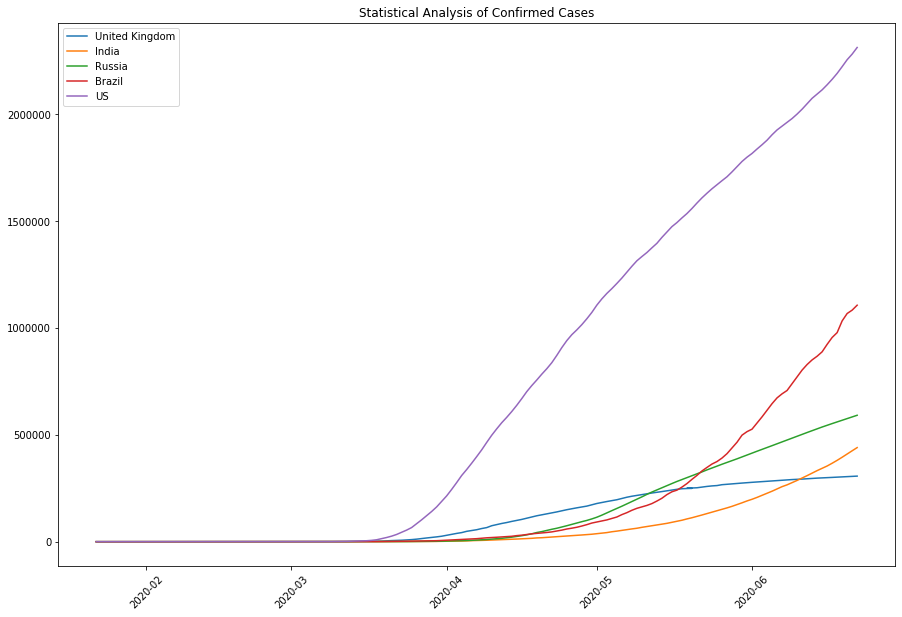

In [6]:
plt.figure (figsize=(15,10))
plt.plot (one.index,one["Confirmed"],label=top.index[0])
plt.plot (two.index,two["Confirmed"],label=top.index[1])
plt.plot (three.index,three["Confirmed"],label=top.index[2])
plt.plot (four.index,four["Confirmed"],label=top.index[3])
plt.plot (five.index,five["Confirmed"],label=top.index[4])
plt.xticks(rotation=45)
plt.legend()
plt.title("Statistical Analysis of Confirmed Cases")

Text(0.5, 1.0, 'Statistical Analysis of Deaths')

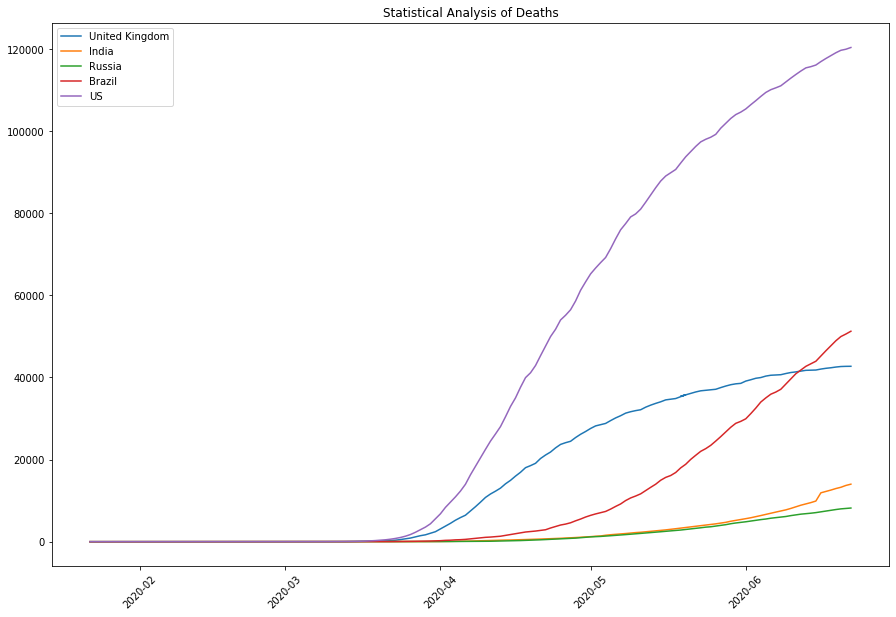

In [7]:
plt.figure (figsize=(15,10))
plt.plot (one.index,one["Deaths"],label=top.index[0])
plt.plot (two.index,two["Deaths"],label=top.index[1])
plt.plot (three.index,three["Deaths"],label=top.index[2])
plt.plot (four.index,four["Deaths"],label=top.index[3])
plt.plot (five.index,five["Deaths"],label=top.index[4])
plt.xticks(rotation=45)
plt.legend()
plt.title("Statistical Analysis of Deaths")

Text(0.5, 1.0, 'Statistical Analysis of Recovered Cases')

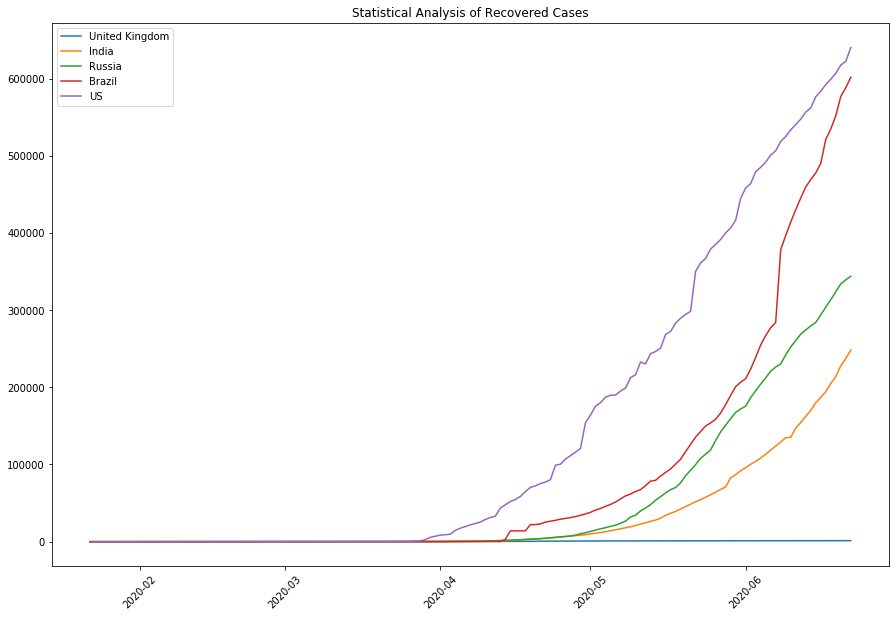

In [8]:
plt.figure (figsize=(15,10))
plt.plot (one.index,one["Recovered"],label=top.index[0])
plt.plot (two.index,two["Recovered"],label=top.index[1])
plt.plot (three.index,three["Recovered"],label=top.index[2])
plt.plot (four.index,four["Recovered"],label=top.index[3])
plt.plot (five.index,five["Recovered"],label=top.index[4])
plt.xticks(rotation=45)
plt.legend()
plt.title("Statistical Analysis of Recovered Cases")

In [9]:
co=covid_data[['Date','Confirmed',"Deaths","Recovered"]]
world_data=co.groupby(['Date']).agg({"Confirmed":"sum","Deaths":"sum","Recovered":"sum"})
world_data["Days Since"]=world_data.index-world_data.index[0]
world_data["Days Since"]=world_data["Days Since"].dt.days
bins=np.linspace(min(world_data['Recovered']),max(world_data['Recovered']),4)
group_names=["low","medium","high"]
world_data["Recoverance Rate"]=pd.cut(world_data["Recovered"],bins,labels=group_names,include_lowest=True)
bins=np.linspace(min(world_data["Confirmed"]),max(world_data["Confirmed"]),4)
world_data["Confirmed Rate"]=pd.cut(world_data["Confirmed"],bins,labels=group_names,include_lowest=True)
bins=np.linspace(min(world_data["Deaths"]),max(world_data["Deaths"]),4)
world_data["Death Rate"]=pd.cut(world_data["Deaths"],bins,labels=group_names,include_lowest=True)
columns_name=['Days Since','Confirmed','Confirmed Rate','Deaths','Death Rate','Recovered','Recoverance Rate']
world_data_reindex=world_data.reindex(columns=columns_name)
world_data=world_data_reindex
world_data["Confirmed"]=world_data["Confirmed"].astype("int")
world_data["Recovered"]=world_data["Recovered"].astype("int")
world_data["Deaths"]=world_data["Deaths"].astype("int")
world_data.head(10)
world_data.tail(15)

,Days Since,Confirmed,Confirmed Rate,Deaths,Death Rate,Recovered,Recoverance Rate
Date,,,,,,,
2020-06-08,138,7118614,high,406584,high,3237190,high
2020-06-09,139,7241951,high,411445,high,3318671,high
2020-06-10,140,7375592,high,416654,high,3396704,high
2020-06-11,141,7513983,high,421445,high,3481671,high
2020-06-12,142,7643519,high,425764,high,3560483,high
2020-06-13,143,7778140,high,430031,high,3645598,high
2020-06-14,144,7911685,high,433375,high,3715556,high
2020-06-15,145,8033720,high,436883,high,3794955,high
2020-06-16,146,8173199,high,443669,high,3892350,high


Pridicting Confirmed cases 

In [10]:
train_pr=world_data.iloc[:int(world_data.shape[0]*0.90)]
test_pr=world_data.iloc[int(world_data.shape[0]*0.90):]
test_pr.tail()

,Days Since,Confirmed,Confirmed Rate,Deaths,Death Rate,Recovered,Recoverance Rate
Date,,,,,,,
2020-06-18,148,8488235,high,453963,high,4090382,high
2020-06-19,149,8666045,high,460053,high,4180522,high
2020-06-20,150,8828267,high,464505,high,4300164,high
2020-06-21,151,8955903,high,468381,high,4368433,high
2020-06-22,152,9097902,high,472155,high,4459666,high


In [11]:
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
pr=PolynomialFeatures(degree=2)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Confirmed"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
pred_pr=lr.predict(te)
#pred_pr,test_lr["Confirmed"]

In [13]:
rmse=np.sqrt(mean_squared_error(test_pr["Confirmed"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

RMSE value for Polynomial Regression: 142932.86093897646


In [14]:
train_pr=world_data.iloc[:int(world_data.shape[0]*0.90)]
test_pr=world_data.iloc[int(world_data.shape[0]*0.90):]
train_pr.head()

,Days Since,Confirmed,Confirmed Rate,Deaths,Death Rate,Recovered,Recoverance Rate
Date,,,,,,,
2020-01-22,0,555,low,17,low,28,low
2020-01-23,1,654,low,18,low,30,low
2020-01-24,2,941,low,26,low,36,low
2020-01-25,3,1434,low,42,low,39,low
2020-01-26,4,2118,low,56,low,52,low


In [15]:
from sklearn.linear_model import *
lr_model=LinearRegression(normalize=True)
lr_model.fit(np.array(train_pr["Days Since"]).reshape(-1,1),np.array(train_pr["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
predict_lr=lr_model.predict(np.array(test_pr["Days Since"]).reshape(-1,1))
#predict_lr,test["Confirmed"]

In [17]:
rmse=np.sqrt(mean_squared_error(test_pr["Confirmed"],predict_lr))
print("RMSE value for Linear Regression:",rmse)

RMSE value for Linear Regression: 2338183.5721247997


In [18]:
train_svm=world_data.iloc[:int(world_data.shape[0]*0.90)]
test_svm=world_data.iloc[int(world_data.shape[0]*0.90):]
train_svm.head()

,Days Since,Confirmed,Confirmed Rate,Deaths,Death Rate,Recovered,Recoverance Rate
Date,,,,,,,
2020-01-22,0,555,low,17,low,28,low
2020-01-23,1,654,low,18,low,30,low
2020-01-24,2,941,low,26,low,36,low
2020-01-25,3,1434,low,42,low,39,low
2020-01-26,4,2118,low,56,low,52,low


In [19]:
svm=SVR(C=3,degree=3,kernel="poly",epsilon=0.01)

In [20]:
svm.fit(np.array(train_svm["Days Since"]).reshape(-1,1),np.array(train_svm["Confirmed"]).reshape(-1,1))

C:\Users\pratyusha\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
c=svm.predict(np.array(test_svm["Days Since"]).reshape(-1,1))
c,test_svm["Confirmed"]

(array([917526.66084373, 920911.16360977, 924345.0743042 , 927828.75095548,
        931362.55159209, 934946.83424248, 938581.95693513, 942268.27769851,
        946006.15456107, 949795.94555128, 953638.00869762, 957532.70202854,
        961480.38357252, 965481.41135802, 969536.14341351, 973644.93776745]),
 Date
 2020-06-07    7014998
 2020-06-08    7118614
 2020-06-09    7241951
 2020-06-10    7375592
 2020-06-11    7513983
 2020-06-12    7643519
 2020-06-13    7778140
 2020-06-14    7911685
 2020-06-15    8033720
 2020-06-16    8173199
 2020-06-17    8349209
 2020-06-18    8488235
 2020-06-19    8666045
 2020-06-20    8828267
 2020-06-21    8955903
 2020-06-22    9097902
 Name: Confirmed, dtype: int32)

In [22]:
rmse=np.sqrt(mean_squared_error(test_svm["Confirmed"],c))
print("RMSE value for SVM:",rmse)

RMSE value for SVM: 7095567.000888053


In [24]:
pre_poly=[]
s=int(input())
for i in range(1,s+1):
    pre_data_poly=pr.fit_transform(np.array(world_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])
pre_poly

3


[9342335.365116477, 9489187.055291882, 9637171.138224725]

In [25]:
from datetime import timedelta
pre_date=[]
pre_lr=[]
pre_svm=[]
for i in range(1,s+1):
    pre_date.append(world_data.index[-1]+timedelta(days=i))
    pre_lr.append(lr_model.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0][0])
    pre_svm.append(svm.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0])

In [26]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_lr,pre_poly,pre_svm),columns=["Date","Linear Regression","Polynomial Regression","SVM"])
model_prediction

,Date,Linear Regression,Polynomial Regression,SVM
0,2020-06-23,6137097.665186,9342335.365116,977808.152448
1,2020-06-24,6187129.774600,9489187.055292,982026.145485
2,2020-06-25,6237161.884014,9637171.138225,986299.274905


No handles with labels found to put in legend.


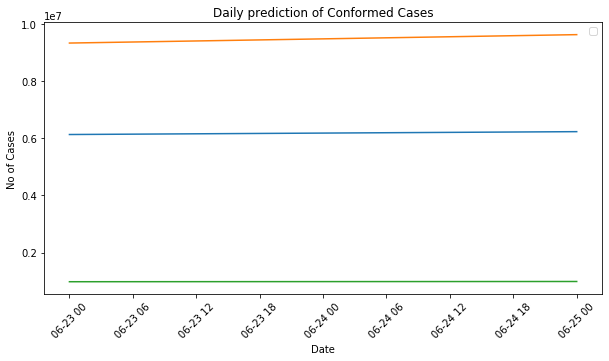

In [27]:
plt.figure(figsize=(10,5))
plt.plot(model_prediction["Date"],model_prediction["Linear Regression"])
plt.plot(model_prediction["Date"],model_prediction["Polynomial Regression"])
plt.plot(model_prediction["Date"],model_prediction["SVM"])
plt.xlabel("Date")
plt.ylabel("No of Cases")
plt.title("Daily prediction of Conformed Cases")
plt.xticks(rotation=45)
plt.legend()

Predicting Deaths

In [28]:
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
pr=PolynomialFeatures(degree=2)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Deaths"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
pred_pr=lr.predict(te)
#pred_pr,test_pr["Deaths"]

In [30]:
rmse=np.sqrt(mean_squared_error(test_pr["Deaths"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

RMSE value for Polynomial Regression: 79277.16774181055


In [31]:
lr_model=LinearRegression(normalize=True)
lr_model.fit(np.array(train_pr["Days Since"]).reshape(-1,1),np.array(train_pr["Deaths"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [32]:
predict_lr=lr_model.predict(np.array(test_pr["Days Since"]).reshape(-1,1))
#predict_lr,test_pr["Deaths"]

In [33]:
rmse=np.sqrt(mean_squared_error(test_pr["Deaths"],predict_lr))
print("RMSE value for Linear Regression:",rmse)

RMSE value for Linear Regression: 67986.23752706077


In [34]:
train_svm=world_data.iloc[:int(world_data.shape[0]*0.90)]
test_svm=world_data.iloc[int(world_data.shape[0]*0.90):]
test_svm.tail()

,Days Since,Confirmed,Confirmed Rate,Deaths,Death Rate,Recovered,Recoverance Rate
Date,,,,,,,
2020-06-18,148,8488235,high,453963,high,4090382,high
2020-06-19,149,8666045,high,460053,high,4180522,high
2020-06-20,150,8828267,high,464505,high,4300164,high
2020-06-21,151,8955903,high,468381,high,4368433,high
2020-06-22,152,9097902,high,472155,high,4459666,high


In [35]:
svm=SVR(C=2,degree=3,kernel="poly",epsilon=0.01)

In [36]:
svm.fit(np.array(train_svm["Days Since"]).reshape(-1,1),np.array(train_svm["Deaths"]).reshape(-1,1))

C:\Users\pratyusha\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
c=svm.predict(np.array(test_svm["Days Since"]).reshape(-1,1))
c,test_svm["Deaths"]

(array([129375.44056249, 131631.77573985, 133921.04953613, 136243.50063699,
        138599.36772806, 140988.88949499, 143412.30462342, 145869.851799  ,
        148361.76970738, 150888.29703419, 153449.67246508, 156046.13468569,
        158677.92238168, 161345.27423868, 164048.42894234, 166787.6251783 ]),
 Date
 2020-06-07    402840
 2020-06-08    406584
 2020-06-09    411445
 2020-06-10    416654
 2020-06-11    421445
 2020-06-12    425764
 2020-06-13    430031
 2020-06-14    433375
 2020-06-15    436883
 2020-06-16    443669
 2020-06-17    448943
 2020-06-18    453963
 2020-06-19    460053
 2020-06-20    464505
 2020-06-21    468381
 2020-06-22    472155
 Name: Deaths, dtype: int32)

In [38]:
rmse=np.sqrt(mean_squared_error(test_svm["Deaths"],c))
print("RMSE value for SVM:",rmse)

RMSE value for SVM: 289997.33769556216


In [39]:
pre_poly=[]
for i in range(1,s+1):
    pre_data_poly=pr.fit_transform(np.array(world_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])
pre_poly

[587792.1684859667, 596791.9145181326, 605858.9883848518]

In [40]:
from datetime import timedelta
pre_date=[]
pre_lr=[]
pre_svm=[]
for i in range(1,s+1):
    pre_date.append(world_data.index[-1]+timedelta(days=i))
    pre_lr.append(lr_model.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0][0])
    pre_svm.append(svm.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0])

In [41]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_lr,pre_poly,pre_svm),columns=["Date","Linear Regression","Polynomial Regression","SVM"])
model_prediction

,Date,Linear Regression,Polynomial Regression,SVM
0,2020-06-23,397220.732783,587792.168486,169563.101632
1,2020-06-24,400463.948961,596791.914518,172375.096990
2,2020-06-25,403707.165139,605858.988385,175223.849936


No handles with labels found to put in legend.


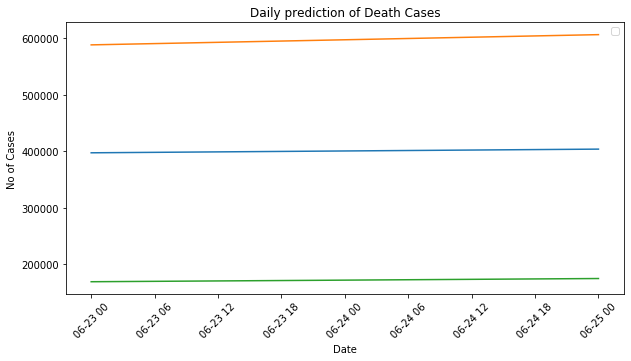

In [42]:
plt.figure(figsize=(10,5))
plt.plot(model_prediction["Date"],model_prediction["Linear Regression"])
plt.plot(model_prediction["Date"],model_prediction["Polynomial Regression"])
plt.plot(model_prediction["Date"],model_prediction["SVM"])
plt.xlabel("Date")
plt.ylabel("No of Cases")
plt.title("Daily prediction of Death Cases")
plt.xticks(rotation=45)
plt.legend()

Pridicting Recovery Cases

In [43]:
train_pr=world_data.iloc[:int(world_data.shape[0]*0.90)]
test_pr=world_data.iloc[int(world_data.shape[0]*0.90):]
test_pr.tail()

,Days Since,Confirmed,Confirmed Rate,Deaths,Death Rate,Recovered,Recoverance Rate
Date,,,,,,,
2020-06-18,148,8488235,high,453963,high,4090382,high
2020-06-19,149,8666045,high,460053,high,4180522,high
2020-06-20,150,8828267,high,464505,high,4300164,high
2020-06-21,151,8955903,high,468381,high,4368433,high
2020-06-22,152,9097902,high,472155,high,4459666,high


In [44]:
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
pr=PolynomialFeatures(degree=2)
t=pr.fit_transform(np.array(train_pr["Days Since"]).reshape(-1,1))
te=pr.fit_transform(np.array(test_pr["Days Since"]).reshape(-1,1))
y=train_pr["Recovered"]
lr=LinearRegression(normalize=True)
lr.fit(t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [45]:
pred_pr=lr.predict(te)
pred_pr,test_pr["Recovered"]

(array([2852542.5324412 , 2910787.53810804, 2969600.76383891,
        3028982.2096338 , 3088931.87549273, 3149449.76141569,
        3210535.86740267, 3272190.19345369, 3334412.73956874,
        3397203.50574781, 3460562.49199091, 3524489.69829805,
        3588985.12466921, 3654048.7711044 , 3719680.63760362,
        3785880.72416687]),
 Date
 2020-06-07    3086268
 2020-06-08    3237190
 2020-06-09    3318671
 2020-06-10    3396704
 2020-06-11    3481671
 2020-06-12    3560483
 2020-06-13    3645598
 2020-06-14    3715556
 2020-06-15    3794955
 2020-06-16    3892350
 2020-06-17    4009755
 2020-06-18    4090382
 2020-06-19    4180522
 2020-06-20    4300164
 2020-06-21    4368433
 2020-06-22    4459666
 Name: Recovered, dtype: int32)

In [46]:
rmse=np.sqrt(mean_squared_error(test_pr["Recovered"],pred_pr))
print("RMSE value for Polynomial Regression:",rmse)

RMSE value for Polynomial Regression: 490448.9568813703


In [47]:
train_lr=world_data.iloc[:int(world_data.shape[0]*0.90)]
test_lr=world_data.iloc[int(world_data.shape[0]*0.90):]
test_lr.tail()

,Days Since,Confirmed,Confirmed Rate,Deaths,Death Rate,Recovered,Recoverance Rate
Date,,,,,,,
2020-06-18,148,8488235,high,453963,high,4090382,high
2020-06-19,149,8666045,high,460053,high,4180522,high
2020-06-20,150,8828267,high,464505,high,4300164,high
2020-06-21,151,8955903,high,468381,high,4368433,high
2020-06-22,152,9097902,high,472155,high,4459666,high


In [48]:
lr_model=LinearRegression()
lr_model.fit(np.array(train_lr["Days Since"]).reshape(-1,1),np.array(train_lr["Recovered"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
predict_lr=lr_model.predict(np.array(test_lr["Days Since"]).reshape(-1,1))
predict_lr,test_lr["Recovered"]

(array([[1944242.76009017],
        [1962996.47130696],
        [1981750.18252376],
        [2000503.89374055],
        [2019257.60495734],
        [2038011.31617414],
        [2056765.02739093],
        [2075518.73860773],
        [2094272.44982452],
        [2113026.16104131],
        [2131779.87225811],
        [2150533.5834749 ],
        [2169287.29469169],
        [2188041.00590849],
        [2206794.71712528],
        [2225548.42834208]]),
 Date
 2020-06-07    3086268
 2020-06-08    3237190
 2020-06-09    3318671
 2020-06-10    3396704
 2020-06-11    3481671
 2020-06-12    3560483
 2020-06-13    3645598
 2020-06-14    3715556
 2020-06-15    3794955
 2020-06-16    3892350
 2020-06-17    4009755
 2020-06-18    4090382
 2020-06-19    4180522
 2020-06-20    4300164
 2020-06-21    4368433
 2020-06-22    4459666
 Name: Recovered, dtype: int32)

In [50]:
rmse=np.sqrt(mean_squared_error(test_lr["Recovered"],predict_lr))
print("RMSE value for Linear Regression:",rmse)

RMSE value for Linear Regression: 1729404.0718118097


In [51]:
train_svm=world_data.iloc[:int(world_data.shape[0]*0.90)]
test_svm=world_data.iloc[int(world_data.shape[0]*0.90):]
test_svm.tail()

,Days Since,Confirmed,Confirmed Rate,Deaths,Death Rate,Recovered,Recoverance Rate
Date,,,,,,,
2020-06-18,148,8488235,high,453963,high,4090382,high
2020-06-19,149,8666045,high,460053,high,4180522,high
2020-06-20,150,8828267,high,464505,high,4300164,high
2020-06-21,151,8955903,high,468381,high,4368433,high
2020-06-22,152,9097902,high,472155,high,4459666,high


In [52]:
svm=SVR(C=3,degree=3,kernel="poly",epsilon=0.01)

In [53]:
svm.fit(np.array(train_svm["Days Since"]).reshape(-1,1),np.array(train_svm["Recovered"]).reshape(-1,1))

C:\Users\pratyusha\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
c=svm.predict(np.array(test_svm["Days Since"]).reshape(-1,1))
c,test_svm["Recovered"]

(array([297904.66084373, 301289.16360977, 304723.0743042 , 308206.75095548,
        311740.55159209, 315324.83424248, 318959.95693513, 322646.27769851,
        326384.15456107, 330173.94555128, 334016.00869762, 337910.70202854,
        341858.38357252, 345859.41135802, 349914.14341351, 354022.93776745]),
 Date
 2020-06-07    3086268
 2020-06-08    3237190
 2020-06-09    3318671
 2020-06-10    3396704
 2020-06-11    3481671
 2020-06-12    3560483
 2020-06-13    3645598
 2020-06-14    3715556
 2020-06-15    3794955
 2020-06-16    3892350
 2020-06-17    4009755
 2020-06-18    4090382
 2020-06-19    4180522
 2020-06-20    4300164
 2020-06-21    4368433
 2020-06-22    4459666
 Name: Recovered, dtype: int32)

In [55]:
rmse=np.sqrt(mean_squared_error(test_svm["Recovered"],c))
print("RMSE value for SVM:",rmse)

RMSE value for SVM: 3480875.3445814955


In [56]:
pre_poly=[]
for i in range(1,s+1):
    pre_data_poly=pr.fit_transform(np.array(world_data["Days Since"].max()+i).reshape(-1,1))
    pre_poly.append(lr.predict(pre_data_poly)[0])
pre_poly

[3852649.030794152, 3919985.5574854617, 3987890.304240801]

In [57]:
from datetime import timedelta
pre_date=[]
pre_lr=[]
pre_svm=[]
for i in range(1,21):
    pre_date.append(world_data.index[-1]+timedelta(days=i))
    pre_lr.append(lr_model.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0][0])
    pre_svm.append(svm.predict(np.array(world_data["Days Since"].max()+i).reshape(-1,1))[0])

In [58]:
pd.set_option('display.float_format',lambda x: '%.6f' % x)
model_prediction=pd.DataFrame(zip(pre_date,pre_lr,pre_poly,pre_svm),columns=["Date","Linear Regression","Polynomial Regression","SVM"])
model_prediction

,Date,Linear Regression,Polynomial Regression,SVM
0,2020-06-23,2244302.139559,3852649.030794,358186.152448
1,2020-06-24,2263055.850776,3919985.557485,362404.145485
2,2020-06-25,2281809.561992,3987890.304241,366677.274905


No handles with labels found to put in legend.


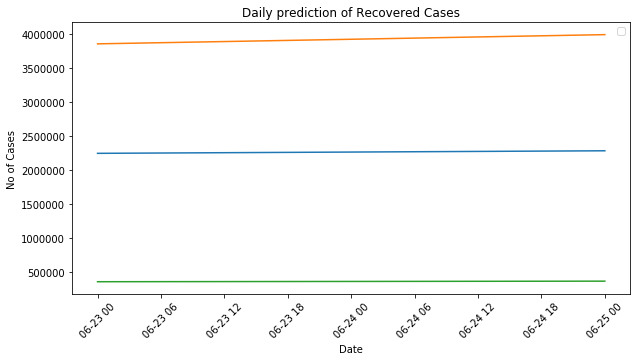

In [59]:
plt.figure(figsize=(10,5))
plt.plot(model_prediction["Date"],model_prediction["Linear Regression"])
plt.plot(model_prediction["Date"],model_prediction["Polynomial Regression"])
plt.plot(model_prediction["Date"],model_prediction["SVM"])
plt.xlabel("Date")
plt.ylabel("No of Cases")
plt.title("Daily prediction of Recovered Cases")
plt.xticks(rotation=45)
plt.legend()